In [8]:


import ipywidgets as wd
import numpy as np
import matplotlib.pyplot as plt
import sympy as symp
import scipy as sc
%matplotlib inline


## Exercises on asymptotics


### Exercise 1
Use the sequence $\{1, sin(\epsilon), sin^2(\epsilon), \ldots \}$

a) 

$ f(\epsilon)= \ln (1+\epsilon) \sim \sin(\epsilon) - \frac{1}{2}\sin^2(\epsilon)+ \frac{1}{2}\sin^3(\epsilon)+ O(\sin^4(\epsilon))$ as $\epsilon \rightarrow 0$.

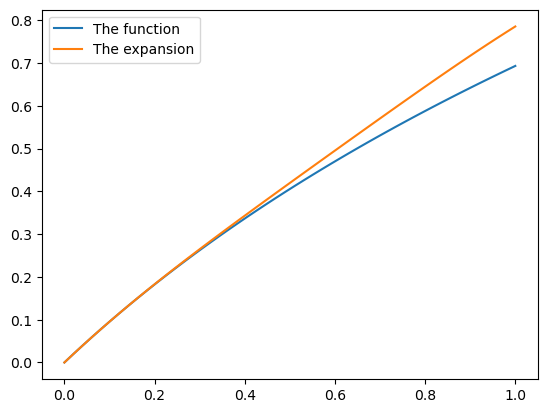

In [5]:
eps=np.linspace(0,1)
func = lambda x: np.log(1+x)
asympt = lambda x: np.sin(x) - 0.5 * np.sin(x)**2 + 0.5 * np.sin(x)**3

plt.plot(eps, func(eps))
plt.plot(eps, asympt(eps))
plt.legend(['The function', "The expansion"])



b) 

$ f(\epsilon)= e^{\epsilon} \sim 1+ \sin(\epsilon) + \frac{1}{2}\sin^2(\epsilon)+ O(\sin^3(\epsilon))$ as $\epsilon \rightarrow 0$.

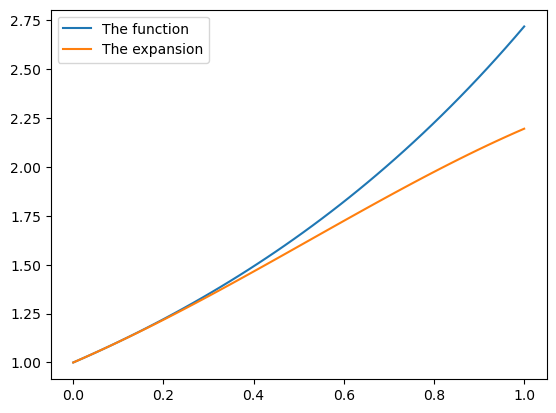

In [6]:
eps=np.linspace(0,1)
func = lambda x: np.exp(x)
asympt = lambda x: 1+ np.sin(x) + 0.5 * np.sin(x)**2 

plt.plot(eps, func(eps))
plt.plot(eps, asympt(eps))
plt.legend(['The function', "The expansion"])



## Exercise 3

$$ \ddot{u}+ u =\epsilon u \dot{u}$$
$$ \Downarrow$$
$$ u \sim \cos(\tau)+\frac{\epsilon}{32}(\cos(3\tau)-\cos(\tau)+O(\epsilon^2))$$
$$ \tau = t (1-\frac{\epsilon}{8}+\frac{3}{256}\epsilon^2+O(\epsilon^3))$$

In [24]:
def rhs(t,u,eps):
    x,y= u
    x_dot = y
    y_dot = - x + eps*x*y
    return [x_dot, y_dot]

eps=0.1
t=np.linspace(0,10,100)
sol = sc.integrate.solve_ivp(rhs, [0,10],[0,1],t_eval=t,args=([eps]))

In [25]:
tau = 1- eps/8+3*eps**2/256
expand = lambda t,eps: np.cos(tau*t)+eps**2*(np.cos(3*tau*t)-np.cos(tau*t))/32

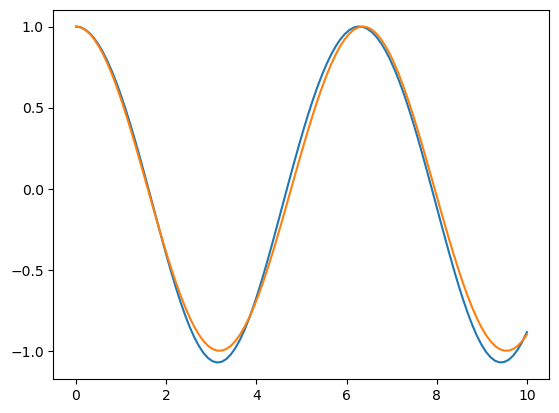

In [23]:
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,expand(sol.t,eps))